# Tutorial: Spatial and Temporal Analysis

> @File    :   Doc_7_Spatial_Temporal_Analysis.ipynb  
> @Time    :   2023/12/15 17:18:59  
> @Author  :   Qiuzi Chen 
> @Version :   1.0  
> @Contact :   qiuzi.chen@outlook.com  
> @Desc    :   
---

In [210]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# whether use Chinese
CHN = False 
if CHN:
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['font.sans-serif'] = ['SimSun']
else:
    plt.rcParams['font.sans-serif'] = ['Arial']
    
# colors
BLUE = '#2878B5'
LIGHTBLUE = '#9AC9DB'
ORANGE = '#F8AC8C'
RED = '#C82423'
PINK = '#FF8884'
GREY = '#9E9E9E'
DEEPGREEN = '#32B897'
GREEN = '#96CCCB'

LABEL_FONT = {
    "fontsize": 12,
    "weight": "bold",
}

plt.rcParams['figure.dpi'] = 150

In [211]:
from analysis import Aggregator

# bins
agg = Aggregator()
SPEED_BIN = agg.SPEED_BIN
ACC_BIN = agg.ACC_BIN
DECEL_BIN = agg.BRAKE_DECEL_BIN
VSP_BIN = agg.VSP_BIN

OpModeERs = np.load("./data/agg/OpModeERs.npy")

## 1 Temporal Analysis

### 1.1 Date

In [212]:
with open("./data/agg/agg_date.pkl", 'rb') as f:
    agg_date = pickle.load(f)

agg_date['brakeFrac'] = agg_date['brakeCount'] / agg_date['trajCount']
agg_date['brakeDecelBinFrac'] = agg_date['brakeDecelBinCount'] / agg_date['brakeCount']
agg_date['OpModeFrac'] = agg_date['OpModeCount'] / agg_date['trajCount']
agg_date['PM10 ER Avg'] = agg_date['OpModeFrac'].apply(lambda x: sum(x * OpModeERs))
agg_date['Daily BWE'] = agg_date['PM10 ER Avg'] * agg_date['trajCount'] / 3600

The average braking fraction on Friday and Saturday is 34.28%, and 34.59% on other days.

In [213]:
agg_date.loc[list(set(agg_date.index) - set([4,5,11,12,18,19,25,26]))]['brakeFrac'].mean()

0.3459080199584276

In [214]:
agg_date.loc[[4,5,11,12,18,19,25,26]]['brakeFrac'].mean()

0.3428435791455442

In [215]:
agg_date['Daily BWE'].mean()

20944.071535485928

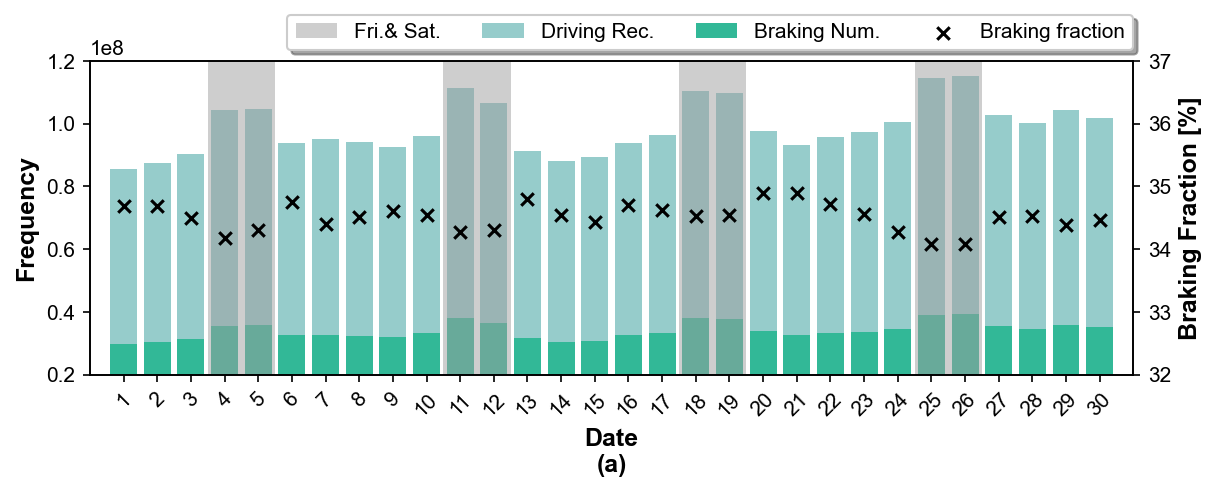

In [216]:
fig, ax = plt.subplots(1,1, figsize=(8,3), constrained_layout=True)

# count-bar
dates = np.arange(1,31)
ax.bar(dates, agg_date['trajCount'], color=GREEN, label="Driving Rec." if CHN==False else "轨迹总数")
# ax.bar(weekend, agg_date.iloc[list(weekend-1)]['trajCount'], color=orange, label="Trajectory(Fri.& Sat.)")
ax.bar(dates, agg_date['brakeCount'], color=DEEPGREEN, label="Braking Num." if CHN==False else "刹车频次")

# span
weekend= np.array([4, 11, 18, 25])
for id, fri in enumerate(weekend):
    if id == 0:
        ax.axvspan(fri-0.5, fri+1.5, facecolor=GREY, alpha=0.5, label="Fri.& Sat." if CHN==False else "周五&周六")
    else:
        ax.axvspan(fri-0.5, fri+1.5, facecolor=GREY, alpha=0.5)

ax.set_xlim(0,31)
ax.set_ylim(0.2*10**8,1.2*10**8)
ax.set_xticks(dates)
ax.set_xticklabels(dates, rotation=45)

# frac-scatter
ax_ = ax.twinx()
ax_.scatter(dates, agg_date['brakeFrac']*100, color="k", marker="x", label="Braking fraction" if CHN==False else "刹车占比")
ax_.set_ylim(32, 37)

# labels
ax.set_xlabel("Date\n(a)" if CHN==False else "日期", fontdict=LABEL_FONT)
ax.set_ylabel("Frequency" if CHN==False else "频率", fontdict=LABEL_FONT)
ax_.set_ylabel("Braking Fraction [%]" if CHN==False else "刹车占比 [%]", fontdict=LABEL_FONT)

fig.legend(loc=1, bbox_to_anchor=(1.01,1.18), bbox_transform=ax.transAxes, ncol=4, shadow=True)
plt.show()

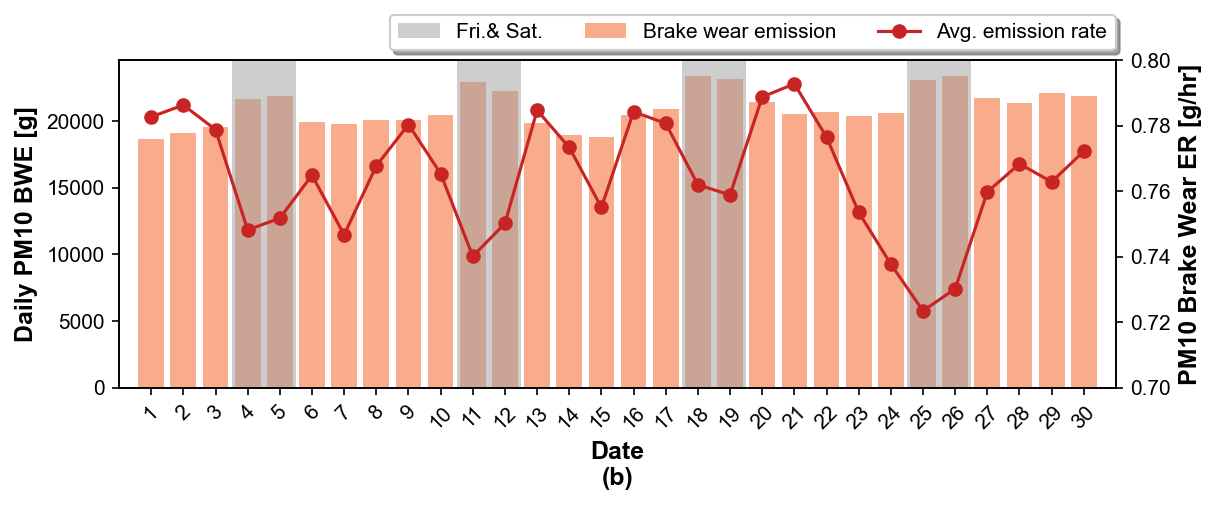

In [217]:
fig, ax = plt.subplots(1,1, figsize=(8,3), constrained_layout=True)

# BWE
dates = np.arange(1,31)
ax.bar(dates, agg_date['Daily BWE'], color=ORANGE, label="Brake wear emission" if CHN==False else "刹车片磨损排放")
ax.set_xlim(0,31)
ax.set_xticks(dates)
ax.set_xticklabels(dates, rotation=45)
ax.set_xlabel("Date\n(b)", fontdict=LABEL_FONT)
ax.set_ylabel("Daily PM10 BWE [g]", fontdict=LABEL_FONT)

# span
weekend= np.array([4, 11, 18, 25])
for id, fri in enumerate(weekend):
    if id == 0:
        ax.axvspan(fri-0.5, fri+1.5, facecolor=GREY, alpha=0.5, label="Fri.& Sat." if CHN==False else "周五&周六")
    else:
        ax.axvspan(fri-0.5, fri+1.5, facecolor=GREY, alpha=0.5)

# plot
ax_ = ax.twinx()
ax_.plot(dates, agg_date['PM10 ER Avg'], color=RED, marker="o", label="Avg. emission rate" if CHN==False else "平均排放率")
ax_.set_ylabel("PM10 Brake Wear ER [g/hr]", fontdict=LABEL_FONT)
ax_.set_ylim(0.7, 0.8)

# labels
fig.legend(loc=1, bbox_to_anchor=(1.01,1.17), bbox_transform=ax.transAxes, ncol=3, shadow=True)
plt.show()

### 1.2 Hour

In [218]:
with open("./data/agg/agg_hour.pkl", 'rb') as f:
    agg_hour = pickle.load(f)
    
agg_hour['brakeFrac'] = agg_hour['brakeCount'] / agg_hour['trajCount']
agg_hour['brakeDecelBinFrac'] = agg_hour['brakeDecelBinCount'] / agg_hour['brakeCount']
agg_hour['OpModeFrac'] = agg_hour['OpModeCount'] / agg_hour['trajCount']
agg_hour['PM10 ER Avg'] = agg_hour['OpModeFrac'].apply(lambda x: sum(x * OpModeERs))
agg_hour['Hourly BWE'] = agg_hour['PM10 ER Avg'] * agg_hour['trajCount'] / 3600 / 30

In [219]:
agg_hour.loc[[0,1,2,3,4,5,6,7,23]]['PM10 ER Avg'].mean()

0.9332130204944981

In [220]:
agg_hour.loc[[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,]]['PM10 ER Avg'].mean()

0.752375659884629

In [221]:
a = agg_hour.loc[[0,1,2,3,4,5,6,7,23]]['PM10 ER Avg'].mean()
b = agg_hour.loc[[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,]]['PM10 ER Avg'].mean()
(a-b)/b

0.24035514471268132

In [222]:
agg_hour.loc[14]['Hourly BWE']

1483.730710014094

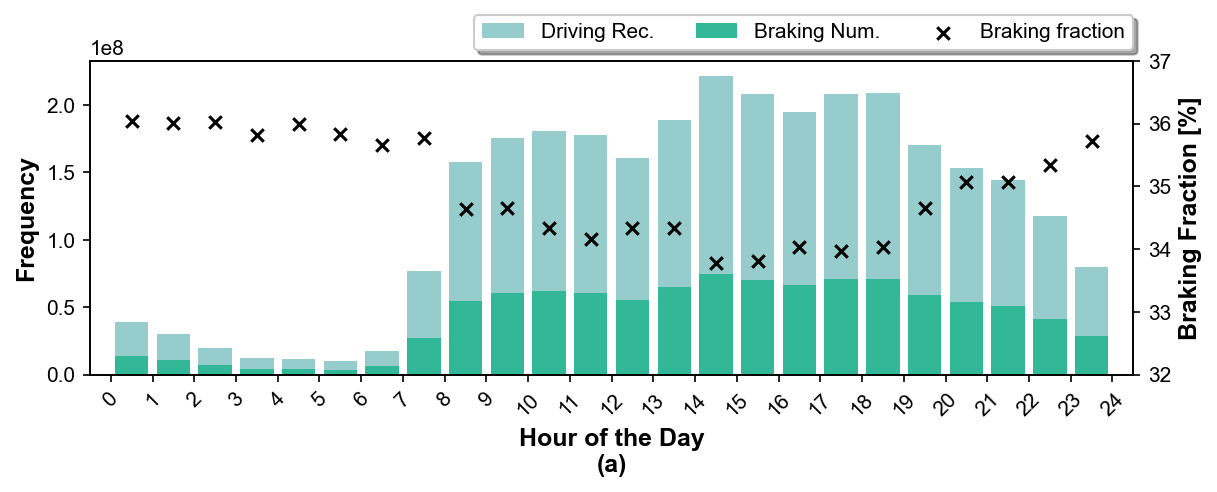

In [253]:
fig, ax = plt.subplots(1,1, figsize=(8,3), constrained_layout=True)

# count-bar
hours = np.arange(0,24)
ax.bar(hours+0.5, agg_hour['trajCount'], color=GREEN, label="Driving Rec." if CHN==False else "轨迹总数")
ax.bar(hours+0.5, agg_hour['brakeCount'], color=DEEPGREEN, label="Braking Num." if CHN==False else "刹车行为")

ax.set_xlim(-0.5,24.5)
# ax.set_ylim(0,1.55*10**8)
ax.set_xticks(np.arange(0, 25))
ax.set_xticklabels(np.arange(0, 25), rotation=45)

# frac-scatter
ax_ = ax.twinx()
ax_.scatter(hours+0.5, agg_hour['brakeFrac']*100, color="k", marker="x", label="Braking fraction" if CHN==False else "刹车占比")
ax_.set_ylim(32, 37)

# labels
ax.set_xlabel("Hour of the Day\n(a)" if CHN==False else "小时", fontdict=LABEL_FONT)
ax.set_ylabel("Frequency" if CHN==False else "频率", fontdict=LABEL_FONT)
ax_.set_ylabel("Braking Fraction [%]" if CHN==False else "刹车占比 [%]", fontdict=LABEL_FONT)

fig.legend(loc=1, bbox_to_anchor=(1.01,1.18), bbox_transform=ax.transAxes, ncol=3, shadow=True)
plt.show()

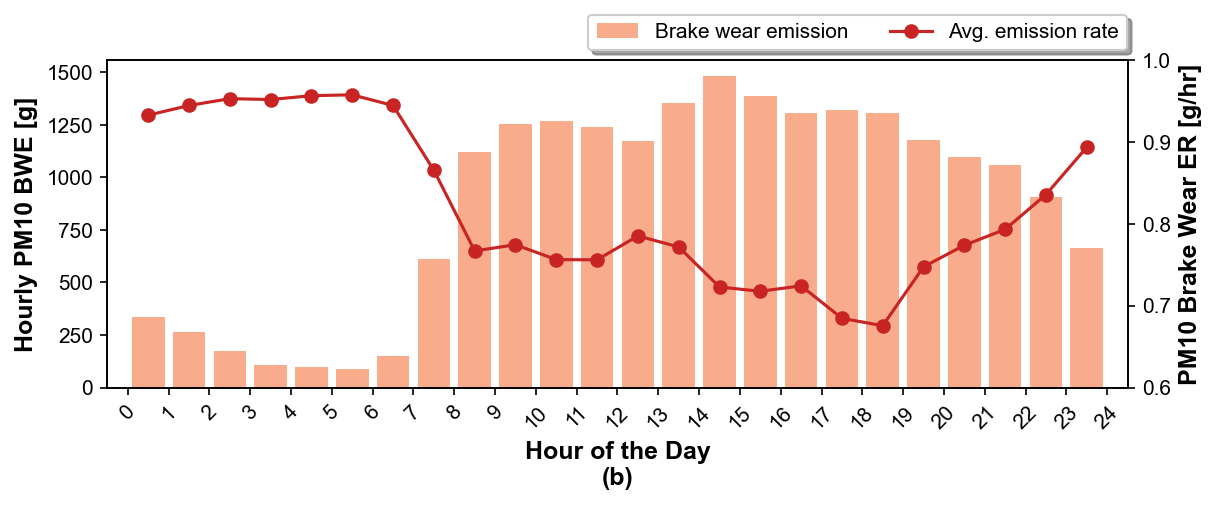

In [252]:
fig, ax = plt.subplots(1,1, figsize=(8,3), constrained_layout=True)

# hourly BWE
hours = np.arange(0,24)
ax.bar(hours+0.5, agg_hour['Hourly BWE'], color=ORANGE, label="Brake wear emission" if CHN==False else "刹车片磨损排放量")
ax.set_xlim(-0.5,24.5)
ax.set_xticks(np.arange(0, 25))
ax.set_xticklabels(np.arange(0, 25), rotation=45)
ax.set_xlabel("Hour of the Day\n(b)" if CHN==False else "小时", fontdict=LABEL_FONT)
ax.set_ylabel("Hourly PM10 BWE [g]" if CHN==False else "小时PM10刹车排放量 [g]", fontdict=LABEL_FONT)


# amount plot
ax_ = ax.twinx()
ax_.plot(hours+0.5, agg_hour['PM10 ER Avg'], color=RED, marker="o", label="Avg. emission rate" if CHN==False else "平均排放率")
ax_.set_ylabel("PM10 Brake Wear ER [g/hr]" if CHN==False else "PM10刹车排放率 [g/hr]", fontdict=LABEL_FONT)
ax_.set_ylim(0.6, 1.0)

fig.legend(loc=1, bbox_to_anchor=(1.01,1.17), bbox_transform=ax.transAxes, ncol=3, shadow=True)
# fig.legend(loc=1, bbox_to_anchor=(1.22,0.7), bbox_transform=ax.transAxes)
plt.show()

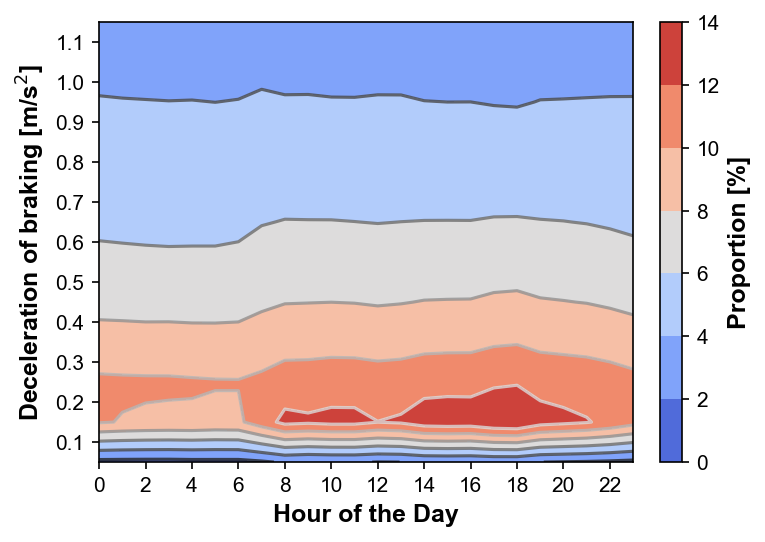

In [225]:
# Decel frac-hours heatmap
fig, ax = plt.subplots(1,1, figsize=(5,3.5), constrained_layout=True)

hours = np.arange(0,24)
decels = DECEL_BIN[:-1]
cmaptype = 'coolwarm'

decel_frac = np.array(agg_hour['brakeDecelBinFrac'])* 100
decel_frac = np.array([list(arr) for arr in decel_frac]).reshape(len(hours), len(DECEL_BIN[:-1]))
decel_frac = decel_frac.T

# heat map
# c = ax.pcolormesh(decel_frac, cmap=cmaptype)
c = ax.contour(decel_frac, cmap="binary_r", alpha=0.8)
c = ax.contourf(decel_frac, cmap=cmaptype)
clb = fig.colorbar(c, ax=ax)
clb.set_label("Proportion [%]" if CHN==False else "占比 [%]", fontdict=LABEL_FONT)

# set axis
ax.set_xticks([i for i in range(0, 24, 2)])
# ax.set_xticklabels([i for i in range(0, 24, 2)])
ax.set_yticks([i+0.5 for i in range(len(DECEL_BIN[:-1]))])
ax.set_yticklabels(["%.1f"% i for i in DECEL_BIN[:-1]])
ax.set_xlim(0, 23)
ax.set_ylim(0, 11)

ax.set_xlabel("Hour of the Day" if CHN==False else "时间", fontdict=LABEL_FONT)
ax.set_ylabel("Deceleration of braking [m/s$^2$]" if CHN==False else "刹车减速度 [m/s$^2$]", fontdict=LABEL_FONT)

plt.show()

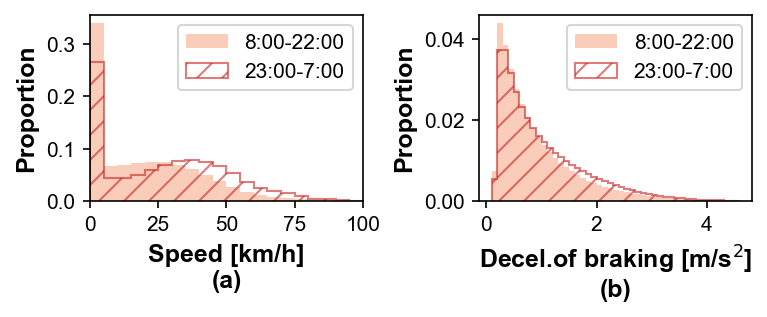

In [296]:
fig, ax = plt.subplots(1,2, figsize=(5,2), constrained_layout=True)

peak = agg_hour.loc[np.arange(8,23,1)].sum()
offpeak = agg_hour.loc[[0,1,2,3,4,5,6,7,23]].sum()

# speed
ax[0].stairs(
    peak['speedBinCount'] / peak['trajCount'], SPEED_BIN,
    color=ORANGE, fill=True, alpha=0.6,
    label='8:00-22:00'
)
ax[0].stairs(
    offpeak['speedBinCount'] / offpeak['trajCount'], SPEED_BIN,
    color=RED, hatch='//', fill=False, alpha=0.6,
    label='23:00-7:00'
)
ax[0].legend()
ax[0].set_xlim(0,100)
ax[0].set_xlabel("Speed [km/h]\n(a)", fontdict=LABEL_FONT)
ax[0].set_ylabel("Proportion", fontdict=LABEL_FONT)

# speed
ax[1].stairs(
    peak['brakeDecelBinCount'] / peak['trajCount'], DECEL_BIN,
    color=ORANGE, fill=True, alpha=0.6,
    label='8:00-22:00'
)
ax[1].stairs(
    offpeak['brakeDecelBinCount'] / offpeak['trajCount'], DECEL_BIN,
    color=RED, hatch='//', fill=False, alpha=0.6,
    label='23:00-7:00'
)
ax[1].legend()
# ax[1].set_xlim(0,100)
ax[1].set_xlabel("Decel.of braking [m/s$^2$]\n(b)", fontdict=LABEL_FONT)
ax[1].set_ylabel("Proportion", fontdict=LABEL_FONT)

plt.show()

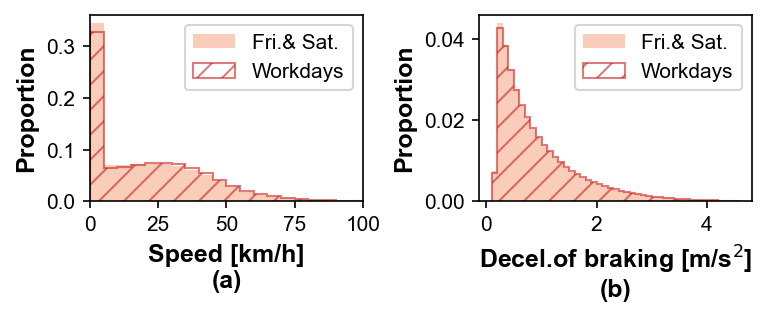

In [297]:
fig, ax = plt.subplots(1,2, figsize=(5,2), constrained_layout=True)

weekday = agg_date.loc[[1,2,3,6,7,8,9,10,13,14,15,16,17,20,21,22,23,25,27,28,29,30]].sum()
weekend = agg_date.loc[[4,5,11,12,18,19,25,26]].sum()

# speed
ax[0].stairs(
    weekend['speedBinCount'] / weekend['trajCount'], SPEED_BIN,
    color=ORANGE, fill=True, alpha=0.6,
    label='Fri.& Sat.'
)
ax[0].stairs(
    weekday['speedBinCount'] / weekday['trajCount'], SPEED_BIN,
    color=RED, hatch='//', fill=False, alpha=0.6,
    label='Workdays'
)
ax[0].legend()
ax[0].set_xlim(0,100)
ax[0].set_xlabel("Speed [km/h]\n(a)", fontdict=LABEL_FONT)
ax[0].set_ylabel("Proportion", fontdict=LABEL_FONT)

# speed
ax[1].stairs(
    weekend['brakeDecelBinCount'] / weekend['trajCount'], DECEL_BIN,
    color=ORANGE, fill=True, alpha=0.6,
    label='Fri.& Sat.'
)
ax[1].stairs(
    weekday['brakeDecelBinCount'] / weekday['trajCount'], DECEL_BIN,
    color=RED, hatch='//', fill=False, alpha=0.6,
    label='Workdays'
)
ax[1].legend()
# ax[1].set_xlim(0,100)
ax[1].set_xlabel("Decel.of braking [m/s$^2$]\n(b)", fontdict=LABEL_FONT)
ax[1].set_ylabel("Proportion", fontdict=LABEL_FONT)

plt.show()

## 2 Spatial

### Link

In [226]:
with open("./data/agg/agg_link.pkl", 'rb') as f:
    agg_link = pickle.load(f)

import geopandas as gpd
roadnet = gpd.read_file("./data/geo/roadnet_simplified.shp")

# link-level aggregation
agg_link = agg_link.join(roadnet.set_index('osmid'))
agg_link = gpd.GeoDataFrame(agg_link, geometry='geometry')

In [227]:
agg_link = agg_link[~(agg_link['brakeCount'] == 0)].copy()

agg_link['brakeFrac'] = agg_link['brakeCount'] / agg_link['trajCount']
agg_link['OpModeFrac'] = agg_link['OpModeCount'] / agg_link['trajCount']
agg_link['PM10 ER Avg'] = agg_link['OpModeFrac'].apply(lambda x: sum(x * OpModeERs))

agg_link['brakeDecelMean'] = agg_link['brakeDecelMean'].apply(np.abs)

agg_link['Daily BWE'] = agg_link['PM10 ER Avg'] * agg_link['trajCount'] / 3600 / 30
agg_link['PM10 EF Avg'] = agg_link['Daily BWE'] * 30 / agg_link['mileage'] * 1000  # mg/km/veh
agg_link['braking per km'] = agg_link['brakeCount'] / agg_link['mileage']

In [228]:
agg_link.describe()

,length[m],PM10 ER Avg
count,2408.000000,2409.000000
mean,694.097658,0.770647
std,697.825122,0.172494
min,9.536000,0.006594
25%,289.852000,0.701247
50%,496.443000,0.766890
75%,885.537500,0.842165
max,11197.761000,2.560533


### Type

In [229]:
# # cumulative data
# agg_link_cum = agg_link.copy()
# for col in ['speedMean', 'accMean', 'VSPMean', 'brakeDecelMean']:
#     agg_link_cum[col] = agg_link_cum[col] * agg_link_cum['trajCount']
# agg_type = agg_link_cum[['trajCount', 'brakeCount', 'mileage', 'speedMean', 'accMean', 'VSPMean', 'brakeDecelMean', 'OpModeCount', 'road type', 'length[m]']].groupby(by='road type').sum()

# # mean data
# for col in ['speedMean', 'accMean', 'VSPMean', 'brakeDecelMean']:
#     agg_type[col] = agg_type[col] / agg_type['trajCount']

# with open("./data/agg/agg_type.pkl", 'wb') as f:
#     pickle.dump(agg_type, f)

In [230]:
with open("./data/agg/agg_type.pkl", 'rb') as f:
    agg_type = pickle.load(f)

# calculate
agg_type['brakeFrac'] = agg_type['brakeCount'] / agg_type['trajCount']
agg_type['OpModeFrac'] = agg_type['OpModeCount'] / agg_type['trajCount']
agg_type['PM10 ER Avg'] = agg_type['OpModeFrac'].apply(lambda x: sum(x * OpModeERs))

agg_type['brakeDecelMean'] = agg_type['brakeDecelMean'].apply(np.abs)

agg_type['Daily BWE'] = agg_type['PM10 ER Avg'] * agg_type['trajCount'] / 3600 / 30
agg_type['PM10 EF Avg'] = agg_type['Daily BWE'] * 30 / agg_type['mileage'] * 1000  # mg/km/veh
agg_type['braking per km'] = agg_type['brakeCount'] / agg_type['mileage']

# sort
highway_types = ["motorway", "trunk", "primary", "secondary", "tertiary", "unclassified", "residential","living_street",
                 "service", "motorway_link", "trunk_link", "primary_link", "secondary_link", "tertiary_link", ]
agg_type = agg_type.loc[highway_types]

### Analysis

In [231]:
# bound
with open("Z:/Data/NEE_Chengdu/traj/processed/gps_20161101_0.pkl", 'rb') as f:
    traj = pickle.load(f)
east, west, north, south = traj['lon'].max(), traj['lon'].min(), traj['lat'].max(), traj['lat'].min(), 
east, west, north, south

(104.1269937640354, 104.03967976411019, 30.73017827690331, 30.655405046818046)

In [232]:
errors = agg_link[['brakeCount', 'speedMean', 'accMean', 'VSPMean', 'brakeDecelMean', 'road type', 'brakeFrac', 'PM10 ER Avg', 'Daily BWE', 'PM10 EF Avg', 'braking per km']].groupby(by='road type').std()
errors = errors.loc[highway_types]

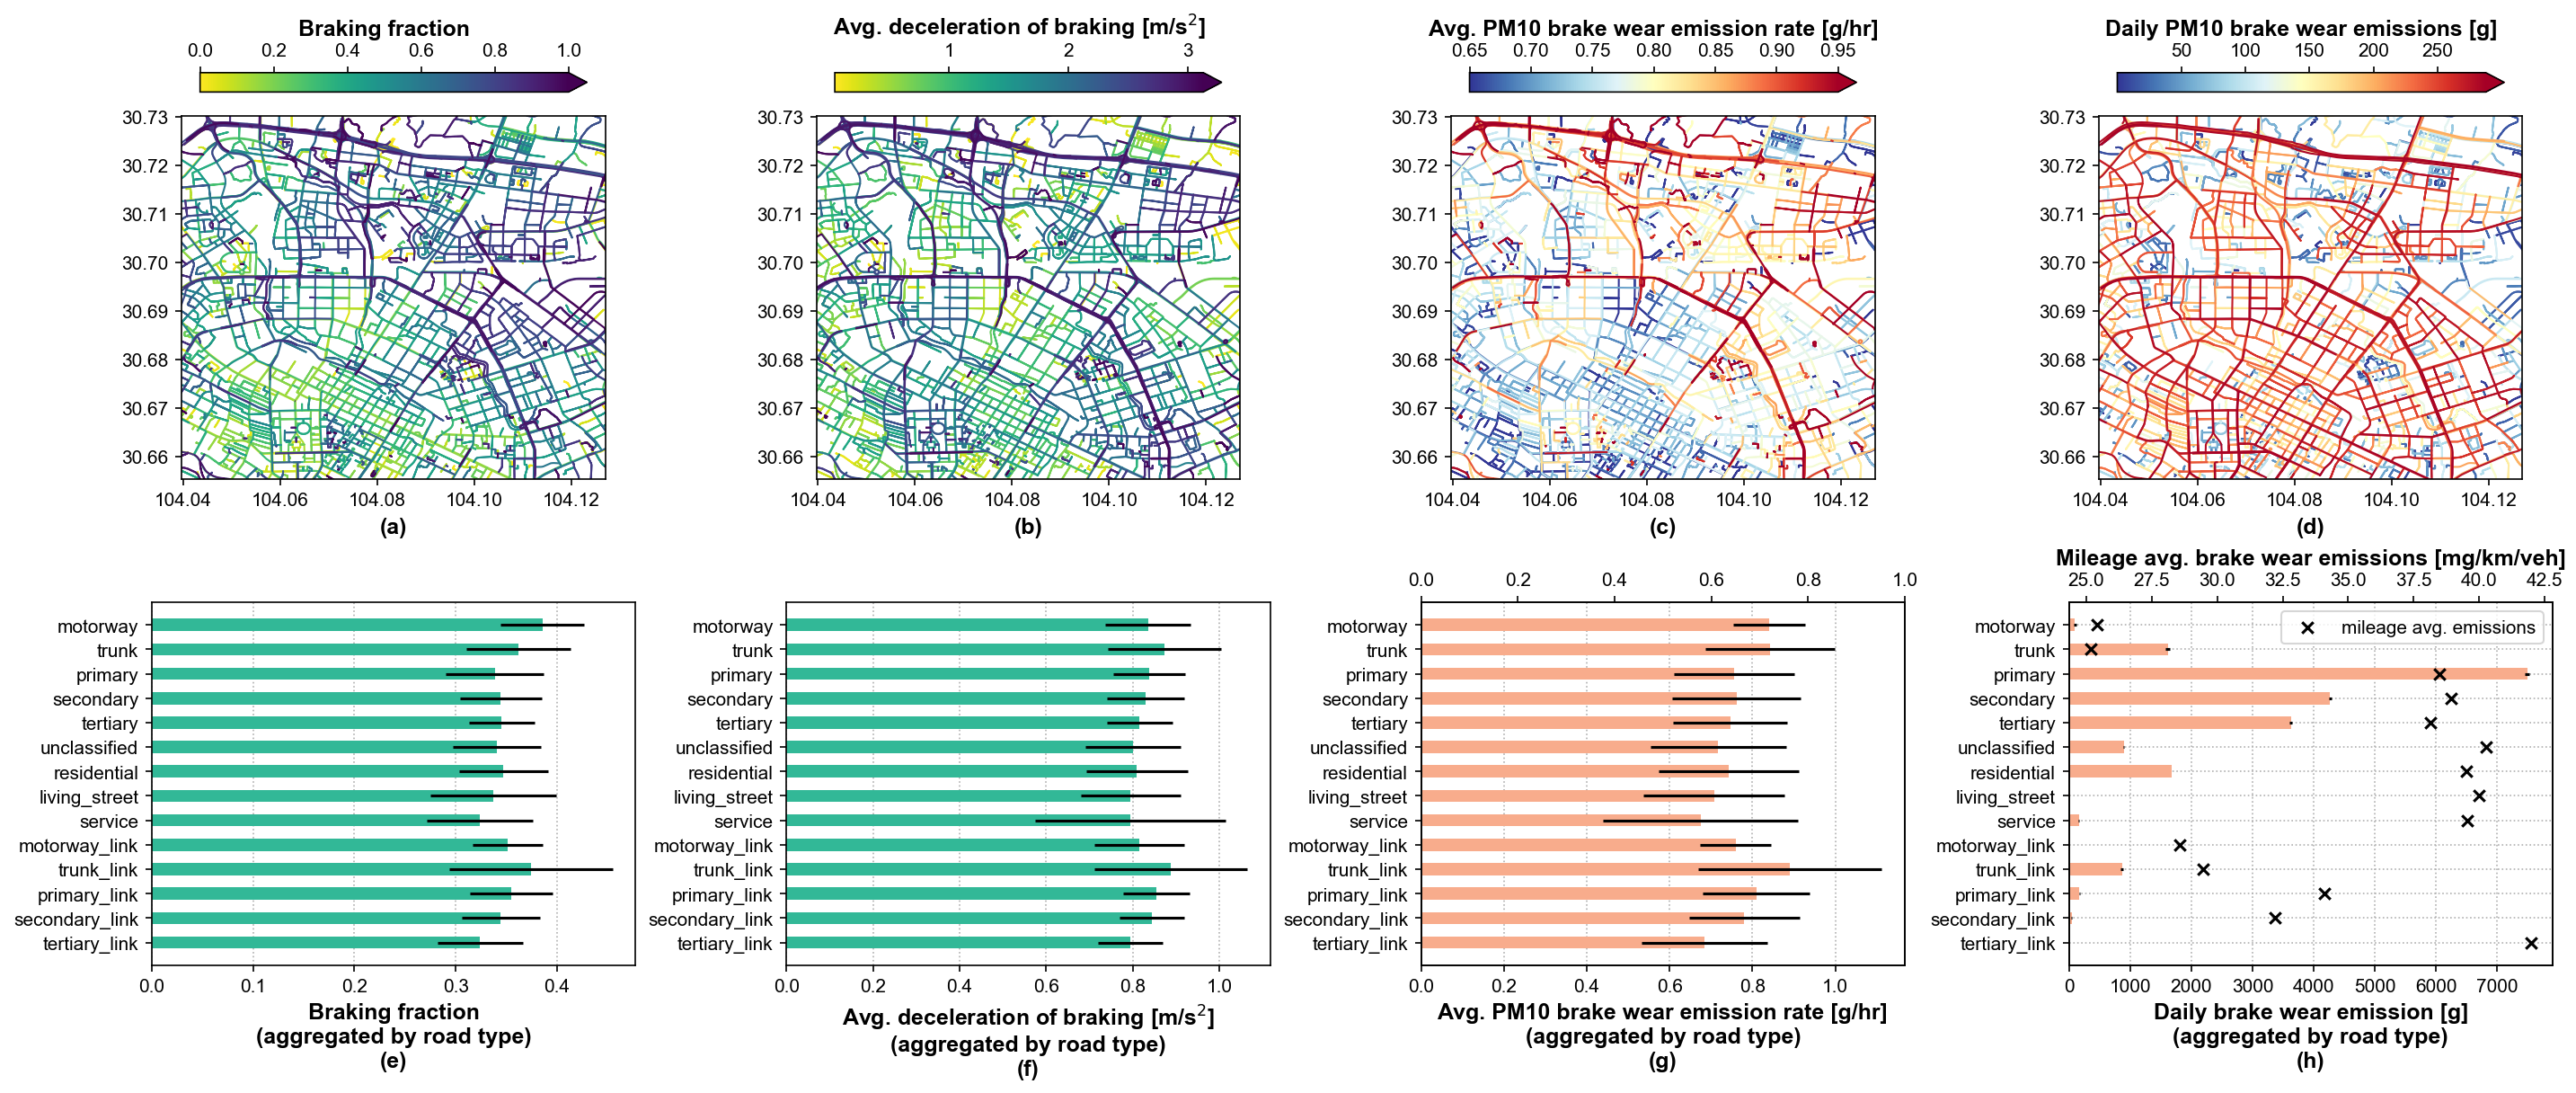

In [233]:
from matplotlib.colors import Normalize

fig, axes = plt.subplots(2, 4, figsize=(19,8), constrained_layout=True)


### fig 1: braking fraction ###
# heat
ax = axes[(0,0)]
agg_link = agg_link.sort_values(by='brakeFrac')
vmin, vmax = agg_link['brakeFrac'].min(), agg_link['brakeFrac'].max()
agg_link.plot(ax=ax, column='brakeFrac', cmap='viridis_r', linewidth=1)
ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.set_xlabel("(a)", fontdict=LABEL_FONT)
cbar = fig.colorbar(plt.cm.ScalarMappable(
                        # norm=Normalize(vmin, vmax),
                        cmap='viridis_r'),
                    ax=ax, location='top', shrink=0.8, extend='max')
cbar.set_label(label='Braking fraction', fontdict=LABEL_FONT)
# barh
ax = axes[(1,0)]
ax.barh(agg_type.index, agg_type['brakeFrac'], height=0.5, xerr=errors['brakeFrac'], color=DEEPGREEN, zorder=2)
# ax.set_ylabel("Road type", fontdict=LABEL_FONT)
ax.set_xlabel("Braking fraction\n(aggregated by road type)\n(e)", fontdict=LABEL_FONT)
ax.grid(axis='x', linestyle=":", zorder=0)
ax.invert_yaxis()


### fig 2: braking deceleration mean ###
# heat
ax = axes[(0,1)]
agg_link = agg_link.sort_values(by='brakeDecelMean')
vmin, vmax = agg_link['brakeDecelMean'].min(), agg_link['brakeDecelMean'].max()
agg_link.plot(ax=ax, column='brakeDecelMean', cmap='viridis_r', linewidth=1)
ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.set_xlabel("(b)", fontdict=LABEL_FONT)
cbar = fig.colorbar(plt.cm.ScalarMappable(
                        norm=Normalize(vmin, vmax),
                        cmap='viridis_r'),
                    ax=ax, location='top', shrink=0.8, extend='max')
cbar.set_label(label='Avg. deceleration of braking [m/s$^2$]', fontdict=LABEL_FONT)
# barh
ax = axes[(1,1)]
ax.barh(agg_type.index, agg_type['brakeDecelMean'], height=0.5, xerr=errors['brakeDecelMean'], color=DEEPGREEN, zorder=2)
# ax.set_ylabel("Road type", fontdict=LABEL_FONT)
ax.set_xlabel("Avg. deceleration of braking [m/s$^2$]\n(aggregated by road type)\n(f)", fontdict=LABEL_FONT)
ax.grid(axis='x', linestyle=":", zorder=0)
ax.invert_yaxis()


### fig 3: avg ER ###
ax = axes[(0,2)]
agg_link = agg_link.sort_values(by='PM10 ER Avg')
vmin, vmax = 0.65, 0.95
agg_link.plot(ax=ax, column='PM10 ER Avg', cmap='RdYlBu_r', linewidth=1, vmin=vmin, vmax=vmax)
ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.set_xlabel("(c)", fontdict=LABEL_FONT)
cbar = fig.colorbar(plt.cm.ScalarMappable(
                        norm=Normalize(vmin, vmax),
                        cmap='RdYlBu_r'),
                    ax=ax, location='top', shrink=0.8, extend='max')
cbar.set_label(label='Avg. PM10 brake wear emission rate [g/hr]', fontdict=LABEL_FONT)
# barh
ax = axes[(1,2)]
ax.barh(agg_type.index, agg_type['PM10 ER Avg'], height=0.5, xerr=errors['PM10 ER Avg'], color=ORANGE, zorder=2)
# ax.set_ylabel("Road type", fontdict=LABEL_FONT)
ax.set_xlabel("Avg. PM10 brake wear emission rate [g/hr]\n(aggregated by road type)\n(g)", fontdict=LABEL_FONT)
ax.grid(axis='x', linestyle=":", zorder=0)
ax_ = ax.twiny()
ax.invert_yaxis()


### fig 4: daily BWE ###
# heat
ax = axes[(0,3)]
agg_link = agg_link.sort_values(by='Daily BWE')
vmin, vmax = agg_link['Daily BWE'].min(), agg_link['Daily BWE'].max()
agg_link.plot(ax=ax, column='Daily BWE', cmap='RdYlBu_r', linewidth=1)
ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.set_xlabel("(d)", fontdict=LABEL_FONT)
cbar = fig.colorbar(plt.cm.ScalarMappable(
                        norm=Normalize(vmin, vmax),
                        cmap='RdYlBu_r'),
                    ax=ax, location='top', shrink=0.8, extend='max')
cbar.set_label(label='Daily PM10 brake wear emissions [g]', fontdict=LABEL_FONT)
# barh
ax = axes[(1,3)]
ax.barh(agg_type.index, agg_type['Daily BWE'], height=0.5, xerr=errors['Daily BWE'], color=ORANGE, zorder=2)
# ax.set_ylabel("Road type", fontdict=LABEL_FONT)
ax.set_xlabel("Daily brake wear emission [g]\n(aggregated by road type)\n(h)", fontdict=LABEL_FONT)
ax.grid(axis='x', linestyle=":", zorder=0)
ax.grid(axis='y', linestyle=":", zorder=0)
ax_ = ax.twiny()
ax_.scatter(agg_type['PM10 EF Avg'], agg_type.index, marker="x", c='k', label='mileage avg. emissions')
ax_.set_xlabel("Mileage avg. brake wear emissions [mg/km/veh]", fontdict=LABEL_FONT)
ax_.legend()
ax.invert_yaxis()

plt.show()

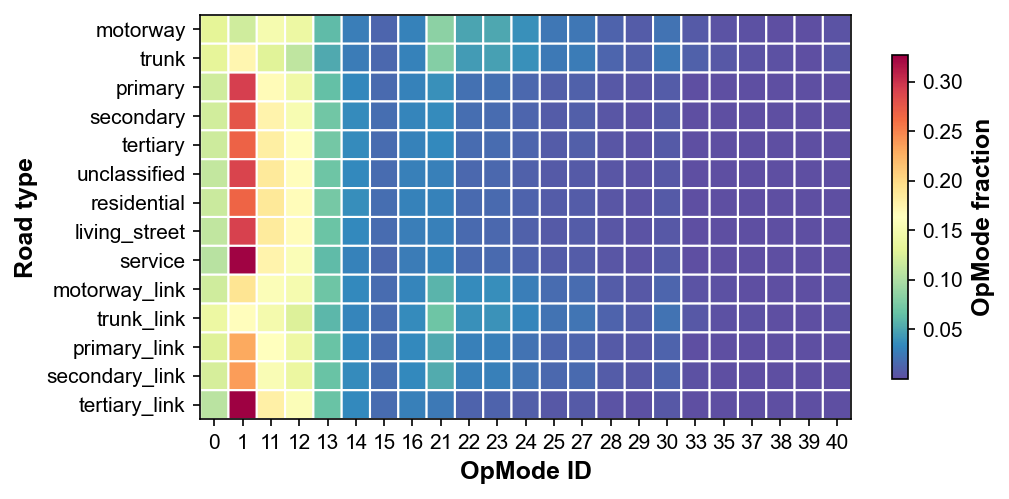

In [234]:
fig, ax = plt.subplots(1,1, figsize=(7,3.5))

cmap = 'Spectral_r'
data = np.array(agg_type['OpModeFrac'].to_list())
OpModes = [0,1,11,12,13,14,15,16,21,22,23,24,25,27,28,29,30,33,35,37,38,39,40]


ax.pcolor(data, cmap=cmap, linewidths=1, edgecolors='white')
ax.invert_yaxis()

cbar = fig.colorbar(plt.cm.ScalarMappable(
                        norm=Normalize(data.min(), data.max()),
                        cmap=cmap),
                    ax=ax, location='right', shrink=0.8)
cbar.set_label(label='OpMode fraction', fontdict=LABEL_FONT)

ax.set_xticks(np.arange(len(OpModes))+0.5)
ax.set_xticklabels(OpModes)
ax.set_yticks(np.arange(len(agg_type.index))+0.5)
ax.set_yticklabels(agg_type.index)

ax.set_xlabel("OpMode ID", fontdict=LABEL_FONT)
ax.set_ylabel("Road type", fontdict=LABEL_FONT)

plt.show()

In [235]:
agg_type.sort_values(by='PM10 ER Avg', ascending=False)['PM10 ER Avg']

road type
trunk_link        0.890498
trunk             0.842399
motorway          0.840038
primary_link      0.809467
secondary_link    0.780225
secondary         0.761495
motorway_link     0.758969
primary           0.755504
tertiary          0.745971
residential       0.742571
unclassified      0.717352
living_street     0.707081
tertiary_link     0.684284
service           0.674768
Name: PM10 ER Avg, dtype: float64

In [236]:
# coefficient of variation
agg_type['PM10 ER Avg'].std() / agg_type['PM10 ER Avg'].mean()

0.08176269698573538

In [237]:
agg_type.sort_values(by='Daily BWE', ascending=False)['Daily BWE']

road type
primary           7490.324989
secondary         4267.711993
tertiary          3627.644433
residential       1678.017879
trunk             1615.742048
unclassified       895.004502
trunk_link         868.988081
primary_link       168.258958
service            160.183095
motorway           100.839499
secondary_link      42.523852
living_street       15.315573
tertiary_link        7.346421
motorway_link        6.148706
Name: Daily BWE, dtype: object

In [238]:
agg_type['BWE frac'] = agg_type['Daily BWE'] / agg_type['Daily BWE'].sum()
agg_type.sort_values(by='BWE frac', ascending=False)['BWE frac']

road type
primary           0.357635
secondary         0.203767
tertiary          0.173206
residential       0.080119
trunk             0.077146
unclassified      0.042733
trunk_link        0.041491
primary_link      0.008034
service           0.007648
motorway          0.004815
secondary_link     0.00203
living_street     0.000731
tertiary_link     0.000351
motorway_link     0.000294
Name: BWE frac, dtype: object

In [239]:
agg_type.sort_values(by='PM10 EF Avg', ascending=False)['PM10 EF Avg']

road type
tertiary_link     41.961006
unclassified      40.264753
living_street     39.975417
service           39.559333
residential       39.492891
secondary         38.916157
primary           38.472127
tertiary          38.121871
primary_link      34.097261
secondary_link    32.202356
trunk_link        29.478744
motorway_link     28.575236
motorway           25.40636
trunk             25.182889
Name: PM10 EF Avg, dtype: object